# Grammatical Evolution of Differential Equations
### Symbolic Regression of Dynamical Systems using PonyGE2 - part 1

---

- **Author:** Michelangelo Pozza
- **Student ID:** IN2300012 
- **Course:** Global and Multiobjective Optimization

---

#### Main tasks:

- Take a physical system governed by a set of differential equations --> single pendulum
- Generate a collection of data from the system (using a
simulation) --> odeint
- Try to evolve the original equations with GP (notice: what
variables do you need? What operators?) --> we define a system of first order differential equation and we evolve both of them

## Dynamics and Simulation of a Damped Single Pendulum

Consider the single pendulum system illustrated below:

<div align="center">
  <img src="img/simple_pend.png" width="500" height="auto">
  <br>
  <em>Figure 1: Schematic of the single pendulum.</em>
</div>

### Governing Equation
The motion of the pendulum is governed by the following second-order non-linear differential equation:

$$\ddot{\theta} + \frac{b}{m} \dot{\theta} + \frac{g}{L} \sin(\theta) = 0$$

### State-Space Representation
To simulate the system using a numerical integrator (such as `odeint`), we must reduce the second-order equation to a system of first-order differential equations.

We define the state vector $x$ as:

$$x = \begin{bmatrix} x_0 \\ x_1 \end{bmatrix} = \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix}$$

The resulting system of equations is:

$$
\begin{bmatrix} \dot{x_0} \\ \dot{x_1} \end{bmatrix} = \begin{bmatrix} x_1 \\ -\frac{g}{L} \sin(x_0) - \frac{b}{m} x_1 \end{bmatrix}
$$

In [ ]:
# Executed in Python 3.10.12

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from sklearn.metrics import mean_squared_error as mse

In [63]:
def physics(y, t, L, m, b, g):
    
    theta, theta_dot = y
    
    theta_ddot = -b/(m)*theta_dot-g/L*np.sin(theta)
    
    return [theta_dot, theta_ddot]

In [64]:
# If you want to change the coefficients, you need to update the grammar file explicitly 
# (at least in grammar "simple" and "medium")

L = 1.0
m = 1.0
b = 0.1
g = 9.8

In [ ]:
# initial conditions
y0 = [np.pi/2, 0]

# simulation time
T = 10

# number of points
N = 500

# simulation time
t_sim = np.linspace(0, T, N)

# integrate the solution
sol = odeint(physics, y0, t_sim, args=(L, m, b, g))

# solution calculate in N rows and 2 columns (N,2)
solution_data = sol

# solution time (N,1)
solution_time = np.array(t_sim).reshape(N,1)

full_data = np.hstack((solution_time, solution_data))

column_names = ['t', 'x[0]', 'x[1]']
save_data = pd.DataFrame(full_data, columns=column_names)
save_data.to_csv('../datasets/single_pendulum.csv', index=False, header=True)

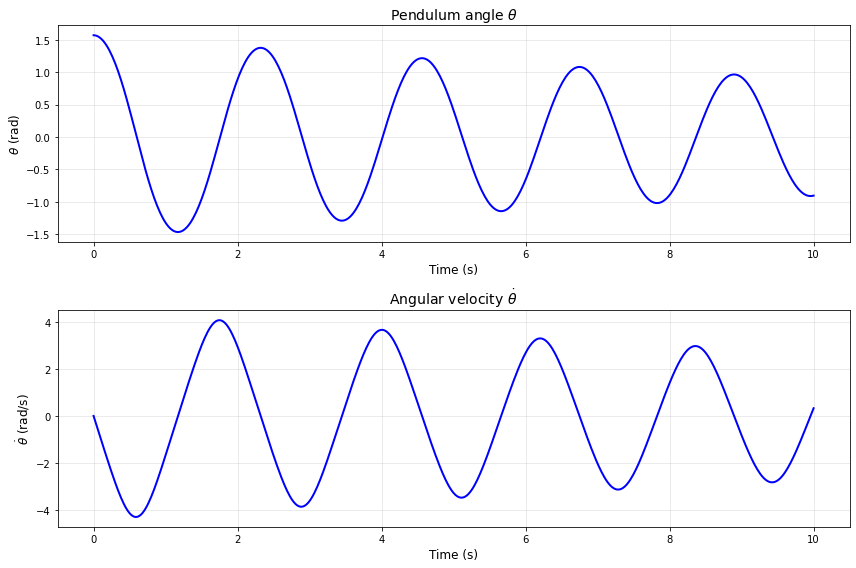

In [66]:
# Let's plot the angle theta and the angular velocity theta_dot    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
# Plot theta
ax1.plot(full_data[:,0], full_data[:,1], 'b-', linewidth=2)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel(r'$\theta$ (rad)', fontsize=12)
ax1.set_title(r'Pendulum angle $\theta$', fontsize=14)
ax1.grid(True, alpha=0.3)

# Plot theta_dot
ax2.plot(full_data[:,0], full_data[:,2], 'b-', linewidth=2)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel(r'$\dot{\theta}$ (rad/s)', fontsize=12) 
ax2.set_title(r'Angular velocity $\dot{\theta}$', fontsize=14)
ax2.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

In [ ]:
# easy grammar: evolve with fixed parameters and fixed x_dot[0] 
# --> find analytical solution
!python3 ponyge.py --parameters single_pendulum_params_easy.txt

# medium grammar: evolve with fixed parameters 
# --> approximate well the system, no guarantees of convergence
#!python3 ponyge.py --parameters single_pendulum_params_medium.txt

# hard grammar: evolve with only the structure fixed: no parameters 
# --> approximate pretty well the system
#!python3 ponyge.py --parameters single_pendulum_params_hard.txt


Start:	 2025-12-11 11:02:19.646846 

         Unit productions consume GE codons.
         Unit productions consume GE codons.
         Unit productions consume GE codons.
         Unit productions consume GE codons.
/home/michelangelo/Documents/Projext/Projext/PonyGE2/src/fitness/ff_single_pendulum.py:67: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(system, self.y0, self.t_eval, full_output=0)
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' no

In [68]:
# this code for extracting the phenotype from the last created folder was partially 
# generated with Gemini Pro

base_path = "../results"

# take the last modified folder
paths = [os.path.join(base_path, d) for d in os.listdir(base_path)]
latest_folder = max([d for d in paths if os.path.isdir(d)], key=os.path.getmtime)

# find the last generation
files = [f for f in os.listdir(latest_folder) if f.endswith('.txt') and f[:-4].isdigit()]
last_file = max(files, key=lambda f: int(f[:-4]))

# read the content
with open(os.path.join(latest_folder, last_file), 'r') as f:
    content = f.read()

phenotype = re.search(r'Phenotype:\n(.+?)\n\nGenotype:', content, re.DOTALL).group(1).strip()
fitness = re.search(r'Fitness:\n(.+?)$', content, re.MULTILINE).group(1).strip()
equations = phenotype.split(';')

print(f"The best phenotype was: {phenotype} with fitness value={fitness}")
print(f"\nSo, the system of equations evolved is:\n--> x[0]'={equations[0]}\n--> x[1]'={equations[1]}")

The best phenotype was: x[1];-0.1*x[1] + -9.8*np.sin(x[0]) with fitness value=0.034

So, the system of equations evolved is:
--> x[0]'=x[1]
--> x[1]'=-0.1*x[1] + -9.8*np.sin(x[0])


In [69]:
def system(x, t):
    
    theta_dot = eval(equations[0])
    theta_ddot = eval(equations[1])
    
    return [theta_dot, theta_ddot]

sol = odeint(system, y0, t_sim)

# solution calculate in N rows and 2 columns (N,2)
solution_data2 = sol

# solution time (N,1)
solution_time2 = np.array(t_sim).reshape(N,1)

full_data2 = np.hstack((solution_time2, solution_data2))

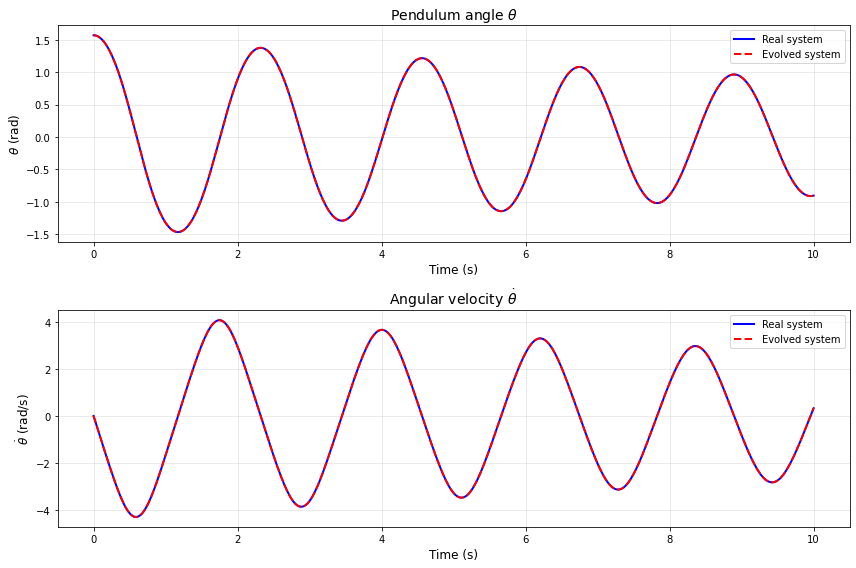

In [70]:
# Let's plot the angle theta and the angular velocity theta_dot    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
# Plot theta
ax1.plot(full_data[:,0], full_data[:,1], 'b-', label='Real system', linewidth=2)
ax1.plot(full_data2[:,0], full_data2[:,1], 'r', linestyle='dashed', label='Evolved system', linewidth=2)
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel(r'$\theta$ (rad)', fontsize=12)
ax1.set_title(r'Pendulum angle $\theta$', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot theta_dot
ax2.plot(full_data[:,0], full_data[:,2], 'b-', label='Real system', linewidth=2)
ax2.plot(full_data2[:,0], full_data2[:,2], 'r', linestyle='dashed', label='Evolved system', linewidth=2)
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel(r'$\dot{\theta}$ (rad/s)', fontsize=12)
ax2.set_title(r'Angular velocity $\dot{\theta}$', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

    
plt.tight_layout()


The mean square error on the angle is: 0.0
The mean square error on the angular velocity is: 0.0


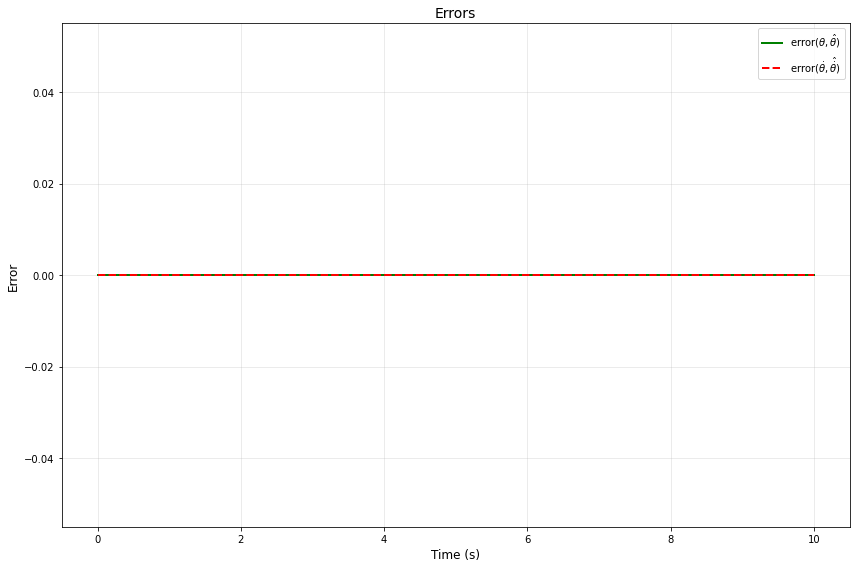

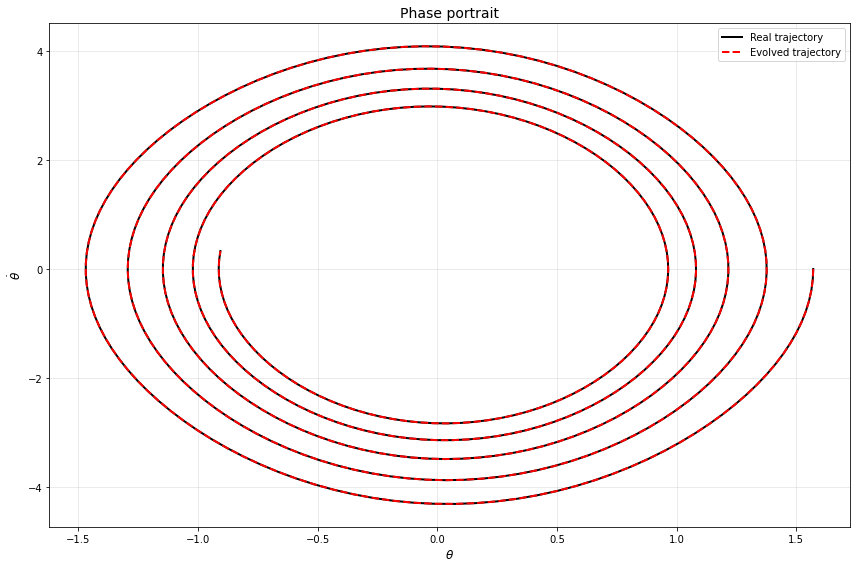

In [ ]:
error_theta = full_data[:,1] - full_data2[:,1]
error_theta_dot = full_data[:,2] - full_data2[:,2]

print("The mean square error on the angle is: " + str(mse(full_data[:,1],full_data2[:,1])))
print("The mean square error on the angular velocity is: " + str(mse(full_data[:,2], full_data2[:,2])))

# Plot Errors
plt.figure(figsize=(12, 8))

plt.plot(full_data[:,0], error_theta, 'g-', label=r'error($\theta, \hat{\theta}$)', linewidth=2)
plt.plot(full_data2[:,0], error_theta_dot, 'r', linestyle='dashed', label=r'error($\dot{\theta}, \hat{\dot{\theta}}$)', linewidth=2)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel(r'Error', fontsize=12)
plt.title(r'Errors', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()

# plot phase portrait
plt.figure(figsize=(12, 8))

plt.plot(full_data[:, 1], full_data[:, 2], 'k-', label='Real trajectory', linewidth=2)
plt.plot(full_data2[:, 1], full_data2[:, 2], 'r--', label='Evolved trajectory', linewidth=2)
plt.xlabel(r'$\theta$', fontsize=12)
plt.ylabel(r'$\dot{\theta}$', fontsize=12)
plt.title('Phase portrait', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
    
plt.tight_layout()